In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import pandas as pd
import os

## Geometry tests

<AxesSubplot:>

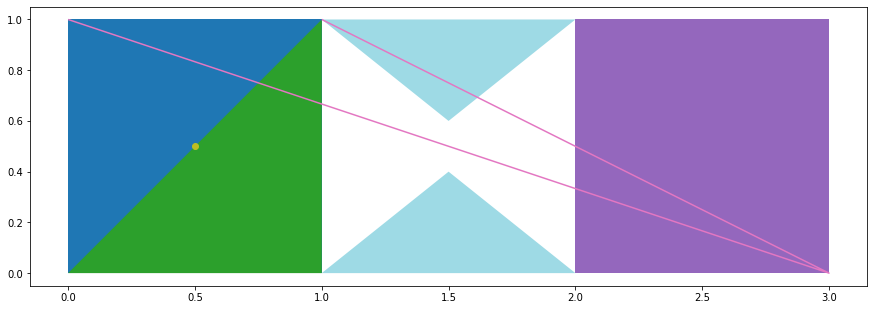

In [2]:
square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
triangle = Polygon([(0, 0), (1, 0), (1, 1)])
square2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
lstring = LineString([(0, 1), (3, 0), (1, 1)])
point = Point(0.5, 0.5)

mp1 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
mp2 = Polygon([(1, 1), (1.5, 0.6), (2, 1)])
mp = MultiPolygon([mp1, mp2])

g = gpd.GeoSeries([square, triangle, square2, lstring, point, mp])
g.plot(cmap='tab20', figsize=(15, 8))

In [3]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

## Exercise 09

<AxesSubplot:>

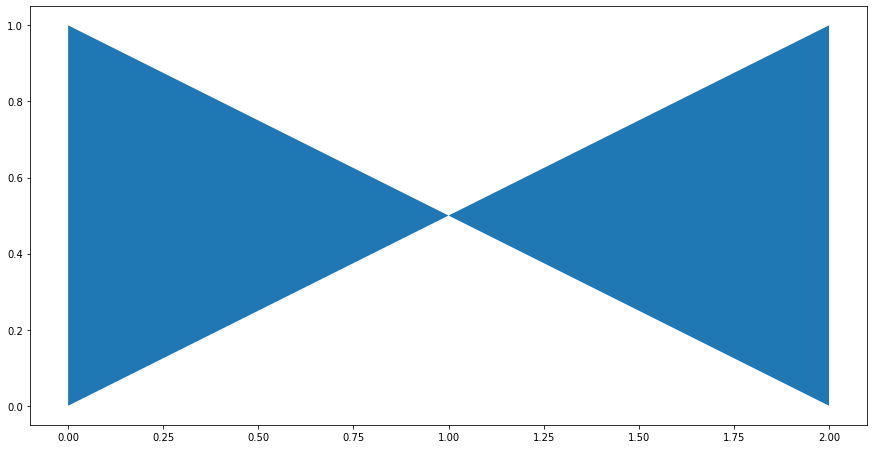

In [4]:
p1 = Polygon([(0, 0), (2, 1), (2, 0), (0, 1)])

g = gpd.GeoSeries([p1])
g.plot(cmap='tab10', figsize=(15,8))

<AxesSubplot:>

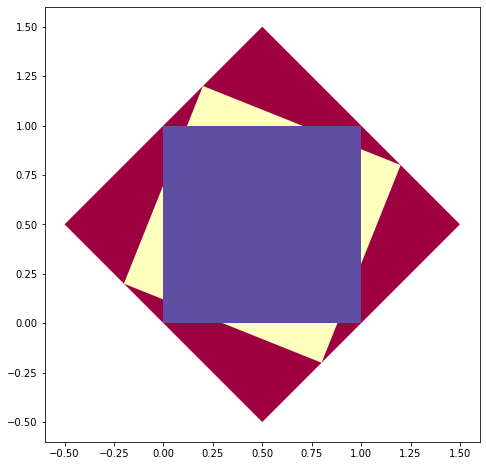

In [5]:
figuras = []
for i in [0.5, 0.2, 0]:
    figuras.append(Polygon([(0 - i, 0 + i),
                            (1 - i, 0 - i),
                            (1 + i, 1 - i),
                            (0 + i, 1 + i)]))

g = gpd.GeoSeries(figuras)
g.plot(cmap='Spectral', figsize=(15,8))

<AxesSubplot:>

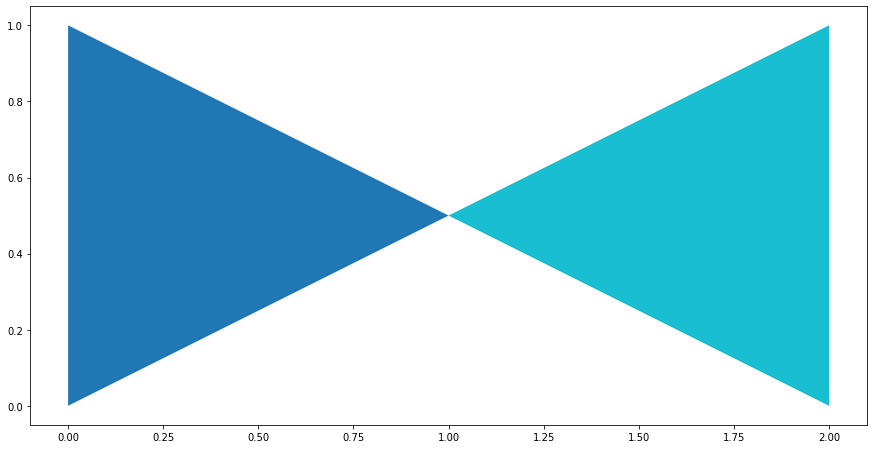

In [6]:
p1 = Polygon([(0, 0), (1, 0.5), (0, 1)])
p2 = Polygon([(2, 0), (1, 0.5), (2, 1)])

g = gpd.GeoSeries([p1, p2])
g.plot(cmap='tab10', figsize=(15,8))

<AxesSubplot:>

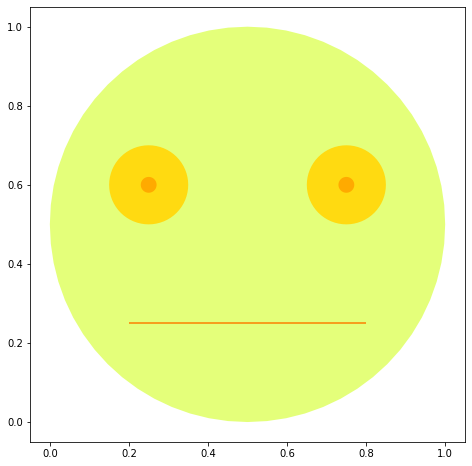

In [7]:
p1 = Point(0.5, 0.5).buffer(0.5)
p2 = MultiPolygon([Point(0.25, 0.6).buffer(0.1), 
                    Point(0.75, 0.6).buffer(0.1)])
p3 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p4 = LineString([(0.2, 0.25), (0.8, 0.25)])

g = gpd.GeoSeries([p1, p2, p3, p4])
g.plot(cmap='Wistia', figsize=(15,8))

## Shapefiles

> Must have at least three files:
> * .shp: shapefile itself
> * .shx: indexing of .shp, linking it to .dbf
> * .dbf: shapefile attributes

> Might have others, like:
> * .cpg: char coding
> * .prj: information related to coordinate system

### RJ

In [8]:
RJ_PATH = '../data/Mapas/RJ/33MUE250GC_SIR.shp'

In [9]:
rj_state = gpd.read_file(RJ_PATH)
rj_state

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


> When we read this .shp, geopandas actually searches for the other necessary shapefile files, and that's why we are able to perform selections over a dataframe

<AxesSubplot:>

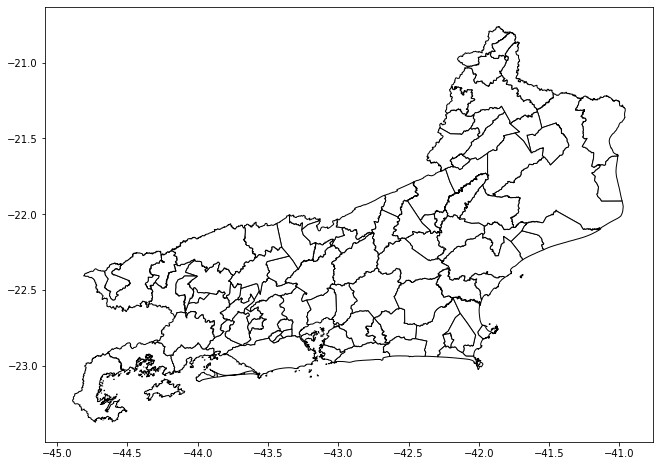

In [10]:
rj_state.plot(
    color='white',
    edgecolor='black',
    figsize=(15, 8)
)

<AxesSubplot:>

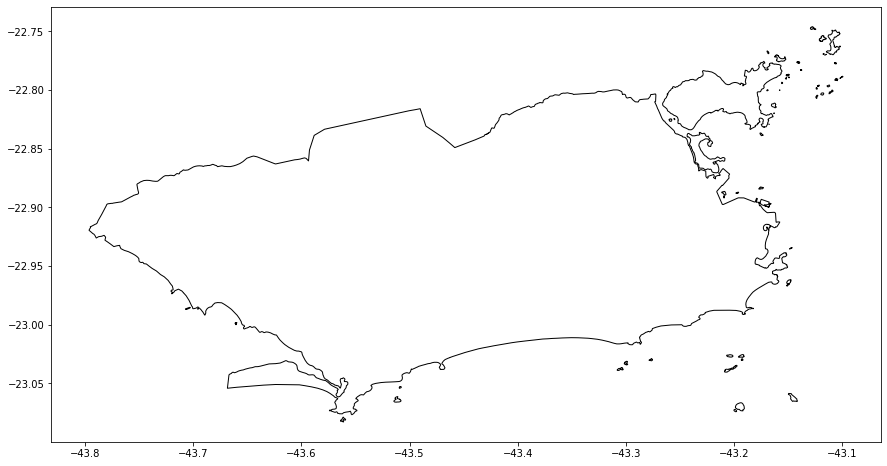

In [11]:
rj = rj_state[rj_state['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj.plot(color='white', edgecolor='black', figsize=(15, 8))

> Also, when we save a geopandas object in a .shp file, it creates all the other necessary shapefile files for us

In [12]:
new_filepath = '../data/Mapas/RJ_City/'
if not os.path.exists(new_filepath):
    os.mkdir(new_filepath) 

In [13]:
rj.to_file(os.path.join(new_filepath, 'rj_city.shp'))
os.listdir(new_filepath)

['rj_city.shx', 'rj_city.prj', 'rj_city.dbf', 'rj_city.shp', 'rj_city.cpg']

## DataFrames and GeoDataFrames

In [14]:
DADOS_TXT_PATH = '../data/dados.txt'

In [15]:
df = pd.read_table(DADOS_TXT_PATH)
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [16]:
geometry = [Point(x) for x in zip(df['Latitude'], df['Longitude'])]

In [17]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

> To create a GeoDataFrame we should define a coordinate system
> * proj: projection, like latlong and others, such as utm (universal transverse mercator, most used by researches because it is more precise locally and has attributes that turn distance estimates more precise) and tmerc (transverse mercator)
> * ellps: earth is actually an ellipsoid, and there are different types of ellipse models, such as WSG84, GRS80 and CLRK80
> * datum: responsible to determine the origin and direction of the coordinate axes, such as WSG84 (datum used on GPS) and SIRGAS2000 (offical datum used in Brazil, because represents better Latin America)

In [18]:
geodf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geodf

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-23.01646 -43.46295)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-22.94320 -43.33691)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-22.87385 -43.30052)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-22.98479 -43.41270)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-14.23500 -51.92528)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-22.87835 -43.55076)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-23.02472 -43.48729)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-22.95943 -43.20618)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-22.91877 -43.26049)


In [19]:
#updating

new_filepath = '../data/Mapas/RJ_City/'
if not os.path.exists(new_filepath):
    os.mkdir(new_filepath)
    
geodf.to_file(os.path.join(new_filepath, 'rj_city.shp'))
os.listdir(new_filepath)

['rj_city.shx', 'rj_city.prj', 'rj_city.dbf', 'rj_city.shp', 'rj_city.cpg']

<AxesSubplot:>

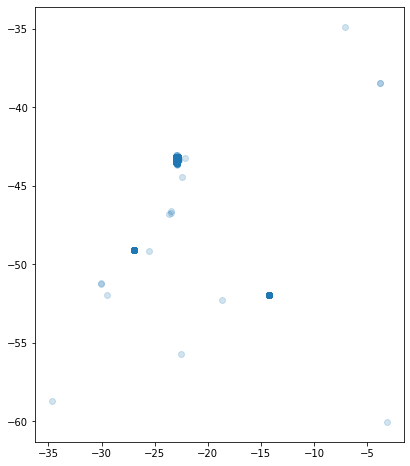

In [20]:
geodf.plot(figsize=(15, 8), alpha=0.2)

> Attribute help us visualizing dense points. In this case, only the most dense cluster is actually at Rio de Janeiro (city), the other ones are outliers, i.e. said to be at RJ bot are not

## Different CRS

> As we can see below, rj and RJ have different CRS. We would like to standardize this so we can work with shapefiles with same CRS. To choose that, we can take a look at an UTM map and figure out that Rio is located at UTM 23, on the South. So we go to https://spatialreference.org/ref/epsg/ and search for SIRGAS (Brazilian standard projection). So we find that EPSG:31983 is what we are looking for, because it refers to SIRGAS 2000 and UTM zone 23S ('S' stands for South). We click on 'Proj4' and now we have the CRS string to use:
> * +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

In [29]:
STD_CRS = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

#PS: we changed units from 'm' to 'km', so distances are computed in km

In [30]:
rj = gpd.read_file('../data/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geodata = gpd.read_file('../data/Mapas/RJ-DATASET/DATASET.shp')

In [31]:
rj = rj.to_crs(STD_CRS)
geodata = geodata.to_crs(STD_CRS)

<AxesSubplot:>

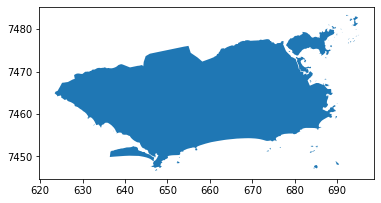

In [32]:
rj.plot()

<AxesSubplot:>

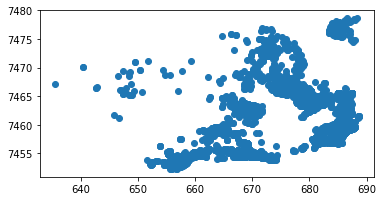

In [33]:
geodata.plot()

In [34]:
rj.crs == geodata.crs

True

In [35]:
geodata.crs #ou rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

### Plotting on levels

In [37]:
geodata

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


In [38]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


<AxesSubplot:>

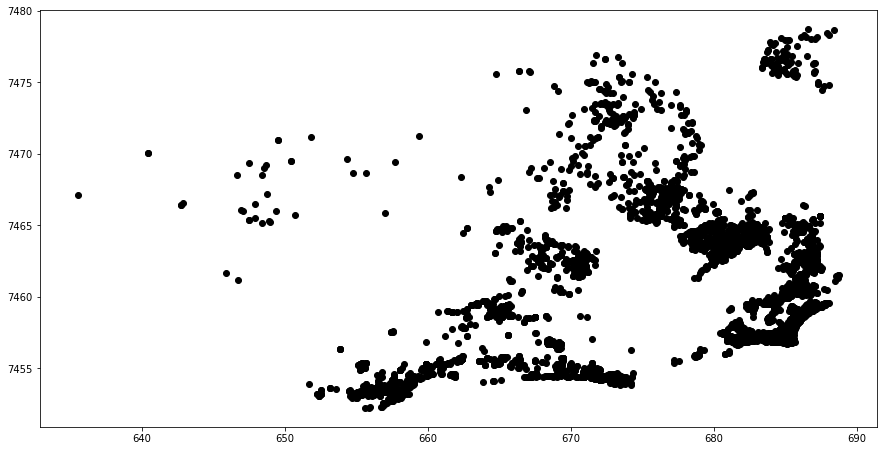

In [40]:
geodata.plot(color='black', edgecolor='black', figsize=(15, 8))

<AxesSubplot:>

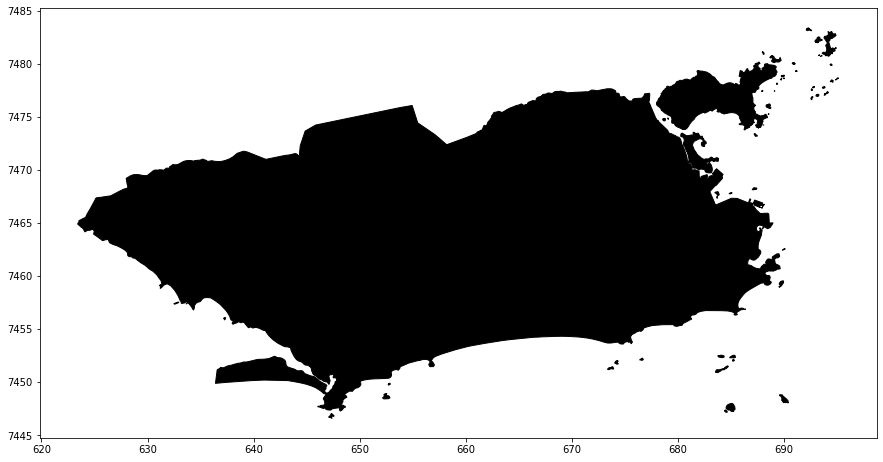

In [41]:
rj.plot(color='black', edgecolor='black', figsize=(15, 8))

### Simple test: is this point inside Rio?

In [43]:
rj #RJ has only one row

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [44]:
geodata

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


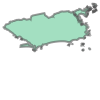

In [54]:
rj.iloc[0]['geometry'] #Rio

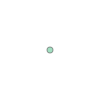

In [56]:
geodata.iloc[0]['geometry'] #Point

In [57]:
geodata.iloc[0]['geometry'].within(rj.iloc[0]['geometry']) #is this point inside Rio?

True

In [58]:
rj.iloc[0]['geometry'].contains(geodata.iloc[0]['geometry']) #does Rio contain this point?

True

In [59]:
mask = geodata['geometry'].within(rj.iloc[0]['geometry'])
mask.unique() #in this case, all outlier points were already removed

array([ True])

<AxesSubplot:>

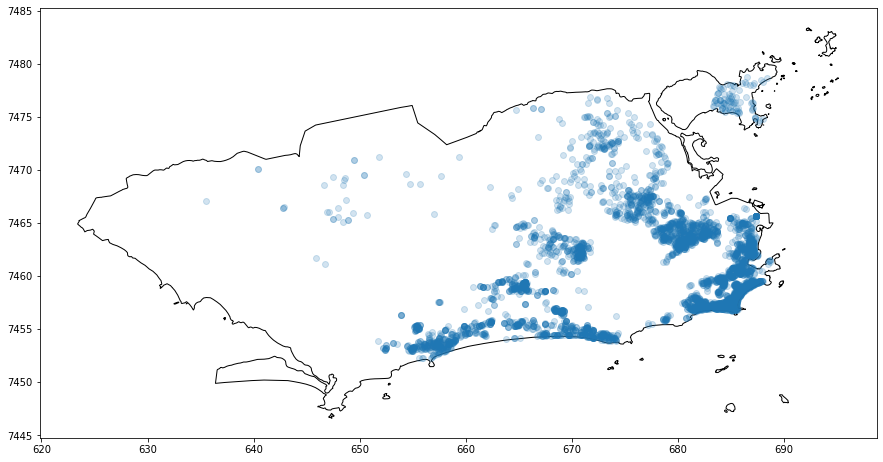

In [69]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geodata.plot(ax=base, alpha=0.2, figsize=(15, 8))

## Adding subway stations

In [74]:
SUBWAY_DATAPATH = '../data/Transporte/Metrô/Estações_Metrô.geojson'
STD_CRS = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [78]:
rj = gpd.read_file('../data/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geodata = gpd.read_file('../data/Mapas/RJ-DATASET/DATASET.shp')

In [75]:
metro = gpd.read_file(SUBWAY_DATAPATH)
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.32329 -22.84795)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (-43.31306 -22.85406)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (-43.30676 -22.86240)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (-43.29741 -22.86785)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (-43.28337 -22.87456)


In [80]:
#setting up standard CRS
metro.to_crs(STD_CRS, inplace=True)
geodata.to_crs(STD_CRS, inplace=True)
rj.to_crs(STD_CRS, inplace=True)
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [81]:
geodata.crs == rj.crs == metro.crs

True

<AxesSubplot:>

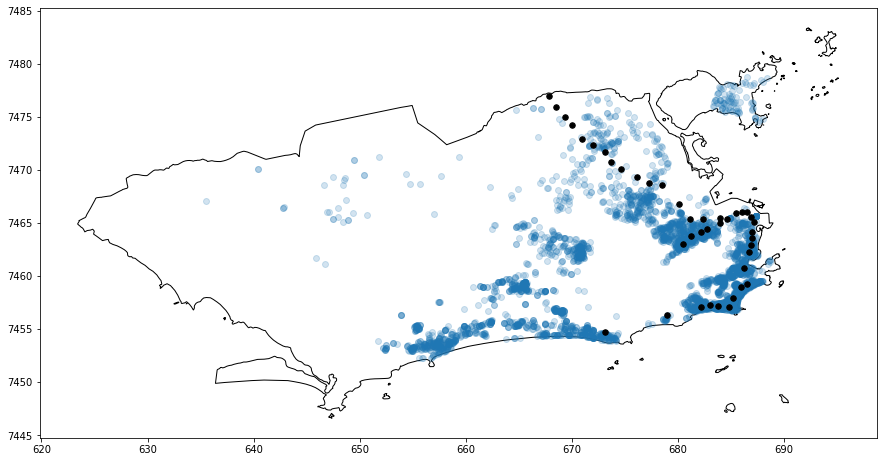

In [87]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geodata.plot(ax=base, alpha=0.2, figsize=(15, 8))
metro.plot(ax=base, color='black', markersize=30, figsize=(15, 8))

### Adding min distance do subway station variable

In [89]:
geodata['min_sub_dist'] = geodata['geometry'].apply(lambda point: metro.distance(point).min())
geodata

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,min_sub_dist
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248


In [90]:
geodata.corr(method='pearson')

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,min_sub_dist
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
min_sub_dist,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [91]:
geodata.corr(method='spearman')

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,min_sub_dist
Area,1.000000,-0.384387,0.056551,0.804070,0.576805,0.589788,0.802873,-0.084095
Latitude,-0.384387,1.000000,0.284642,-0.265704,-0.401880,-0.329401,-0.555850,-0.132528
Longitude,0.056551,0.284642,1.000000,-0.004641,-0.221257,-0.330509,0.299471,-0.762101
Quartos,0.804070,-0.265704,-0.004641,1.000000,0.510314,0.526818,0.625421,-0.023303
Suites,0.576805,-0.401880,-0.221257,0.510314,1.000000,0.576110,0.499086,0.188011
Vagas,0.589788,-0.329401,-0.330509,0.526818,0.576110,1.000000,0.449104,0.264542
Valor,0.802873,-0.555850,0.299471,0.625421,0.499086,0.449104,1.000000,-0.335035
min_sub_dist,-0.084095,-0.132528,-0.762101,-0.023303,0.188011,0.264542,-0.335035,1.000000


In [98]:
corr_value_sdist = geodata['Valor'].corr(geodata['min_sub_dist'], method='pearson')
"i.e. negative correlation between min distance to subway station and house value: {}".format(corr_value_sdist)

'i.e. negative correlation between min distance to subway station and house value: -0.19564083161686924'

## Exercise 06

In [139]:
STD_CRS

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [181]:
df06 = pd.DataFrame(
    [[-22.9531, -43.1884],
    [-23.0278, -43.4665],
    [-22.8463, -43.3007],
    [-22.8969, -43.3165]],
    columns=['Latitude', 'Longitude'],
)
points06 = [Point(x) for x in zip(df06['Longitude'], df06['Latitude'])]
geodf06 = gpd.GeoDataFrame(df06, geometry=points06)
geodf06.set_crs(epsg=4326, inplace=True)

,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (-43.18840 -22.95310)
1,-23.0278,-43.4665,POINT (-43.46650 -23.02780)
2,-22.8463,-43.3007,POINT (-43.30070 -22.84630)
3,-22.8969,-43.3165,POINT (-43.31650 -22.89690)


In [186]:
geodf06.to_crs(STD_CRS, inplace=True)
metro.to_crs(STD_CRS, inplace=True)

<AxesSubplot:>

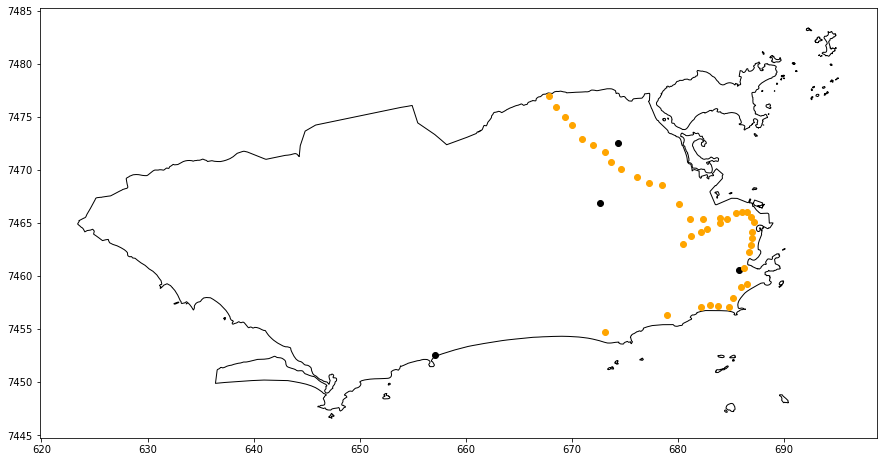

In [213]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geodf06.plot(ax=base, color='black')
metro.plot(ax=base, color='orange')

In [210]:
idxs_max = geodf06['geometry'].apply(lambda point: metro['geometry'].distance(point).idxmax())
idxs_min = geodf06['geometry'].apply(lambda point: metro['geometry'].distance(point).idxmin())
max_names = metro.iloc[idxs_max]['Nome']
min_names = metro.iloc[idxs_min]['Nome']
maxs = geodf06['geometry'].apply(lambda point: metro['geometry'].distance(point).max())
mins = geodf06['geometry'].apply(lambda point: metro['geometry'].distance(point).min())

geodf06['min_names'] = min_names.to_list()
geodf06['min'] = mins.to_list()
geodf06['max_names'] = max_names.to_list()
geodf06['max'] = maxs.to_list()
geodf06

,Latitude,Longitude,geometry,min_names,min,max_names,max
0,-22.9531,-43.1884,POINT (685.741 7460.527),Botafogo,0.513153,Pavuna,24.309365
1,-23.0278,-43.4665,POINT (657.136 7452.580),Jardim Oceânico,16.118584,Cinelândia,32.510425
2,-22.8463,-43.3007,POINT (674.361 7472.491),Vicente de Carvalho,1.532388,Ipanema / General Osório,18.653995
3,-22.8969,-43.3165,POINT (672.676 7466.906),Engenho da Rainha,3.766528,Cardeal Arcoverde,15.795919


## Adding other means of transportation

In [214]:
train = gpd.read_file('../data/Transporte/Trem/Estações_Trem.geojson')
brt = gpd.read_file('../data/Transporte/BRT/Estações_BRT.geojson')
metro = gpd.read_file('../data/Transporte/Metrô/Estações_Metrô.geojson')
rj = gpd.read_file('../data/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geodata = gpd.read_file('../data/Mapas/RJ-DATASET/DATASET.shp')

In [215]:
STD_CRS = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'
train.to_crs(STD_CRS, inplace=True)
brt.to_crs(STD_CRS, inplace=True)
metro.to_crs(STD_CRS, inplace=True)
rj.to_crs(STD_CRS, inplace=True)
geodata.to_crs(STD_CRS, inplace=True)

<AxesSubplot:>

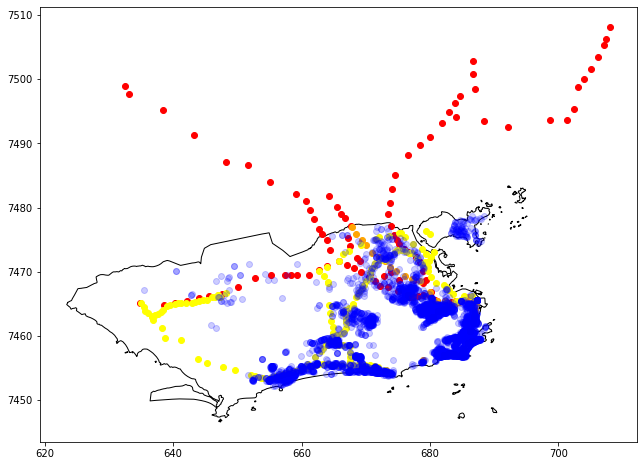

In [217]:
base = rj.plot(color='white', edgecolor='black')
train.plot(ax=base, color='red')
metro.plot(ax=base, color='orange')
brt.plot(ax=base, color='yellow')
geodata.plot(ax=base, color='blue', alpha=0.2)

In [218]:
#removing train stations out of RJ
train = train[train['geometry'].within(rj.iloc[0]['geometry'])]

<AxesSubplot:>

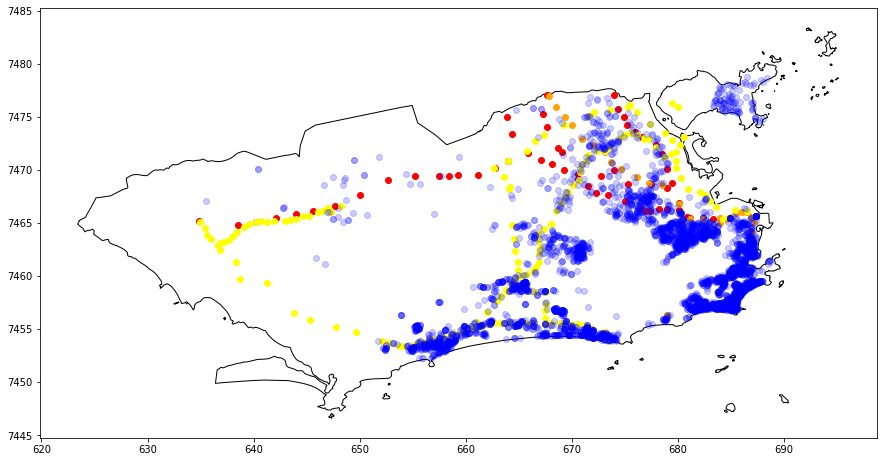

In [219]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
train.plot(ax=base, color='red')
metro.plot(ax=base, color='orange')
brt.plot(ax=base, color='yellow')
geodata.plot(ax=base, color='blue', alpha=0.2)

In [223]:
transport = pd.concat([train.geometry, metro.geometry, brt.geometry], ignore_index=True)
print(type(transport))
print(transport)

<class 'geopandas.geoseries.GeoSeries'>
0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry


In [224]:
geodata['dist_to_any_transport'] = geodata['geometry'].apply(lambda point: transport.distance(point).min())
geodata

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,dist_to_any_transport
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),0.214605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),2.129366
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),0.563492
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),1.871081


In [225]:
geodata.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,dist_to_any_transport
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.103653
dist_to_any_transport,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,1.000000


In [226]:
corr_value_sdist = geodata['Valor'].corr(geodata['dist_to_any_transport'], method='pearson')
"i.e. less correlated than min distance to a subway station: {}".format(corr_value_sdist)

'i.e. less correlated than min distance to a subway station: -0.10365283748646183'

## Distance to nearest beach

<AxesSubplot:>

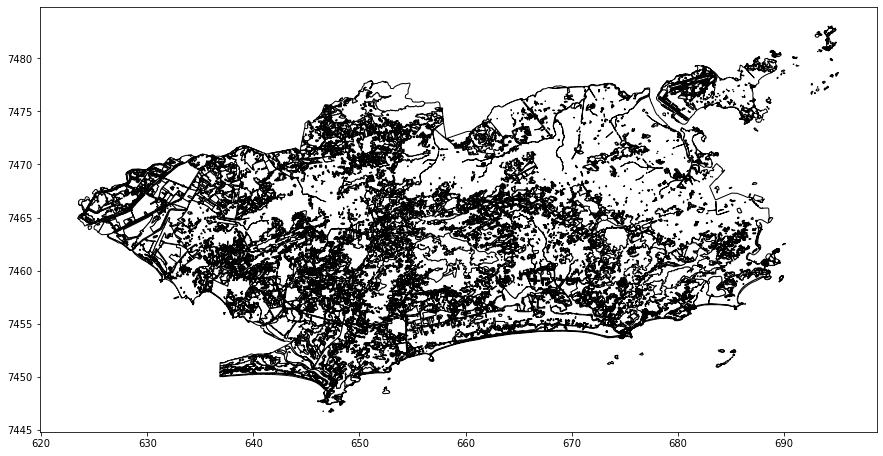

In [234]:
beaches = gpd.read_file('../data/VegetaçãoeUsodoSolo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')
beaches.to_crs(STD_CRS, inplace=True)
beaches.plot(color='white', edgecolor='black', figsize=(15, 8))

<AxesSubplot:>

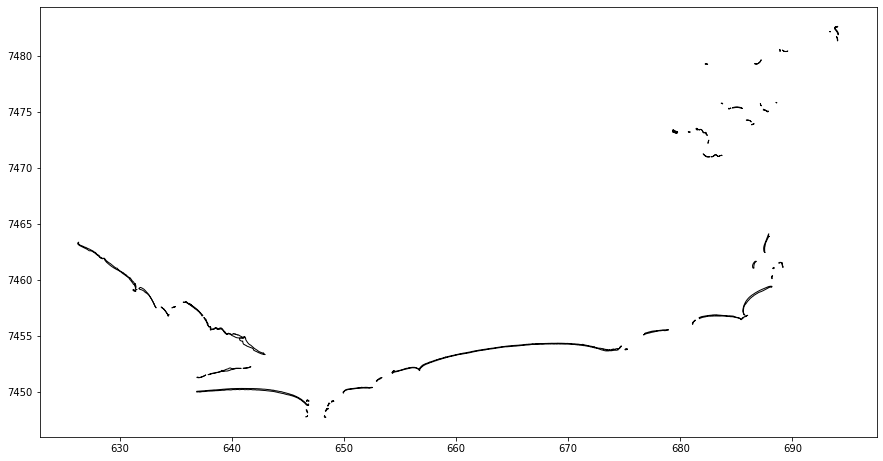

In [235]:
beaches = beaches[beaches['legenda'] == 'Praia']
beaches.plot(color='white', edgecolor='black', figsize=(15, 8))

<AxesSubplot:>

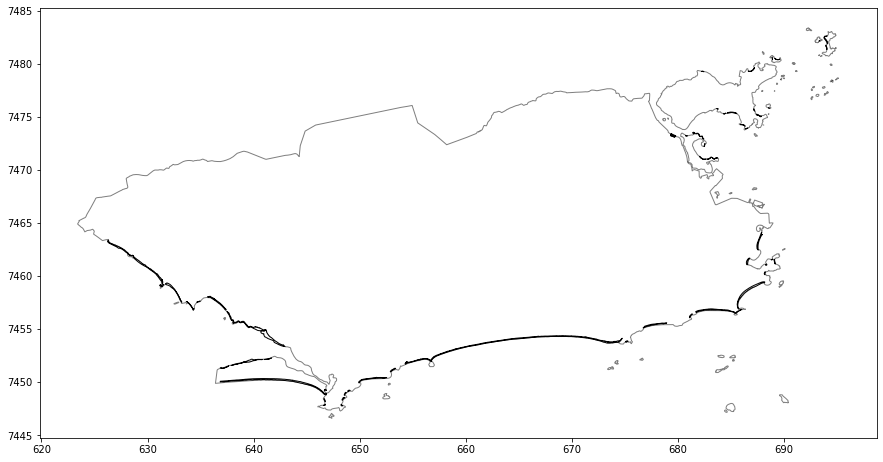

In [236]:
base = rj.plot(color='white', edgecolor='black', alpha=0.5, figsize=(15, 8))
beaches.plot(ax=base, color='white', edgecolor='black', figsize=(15, 8))

In [237]:
geodata['dist_to_beach'] = geodata['geometry'].apply(lambda point: beaches.distance(point).min())
geodata

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,dist_to_any_transport,dist_to_beach
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),0.443193,1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),3.642787,7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.641470,6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),0.422370,3.404589
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),0.214605,1.369015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),2.129366,16.133493
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),0.563492,0.955964
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.612550
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),1.871081,7.679812


In [238]:
geodata.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,dist_to_any_transport,dist_to_beach
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,0.358735,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,-0.014628,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.006363,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.070240,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.103653,-0.361519
dist_to_any_transport,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,1.000000,0.230641
dist_to_beach,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.230641,1.000000


In [240]:
corr_value_sdist = geodata['Valor'].corr(geodata['dist_to_beach'], method='pearson')
"i.e. high negative correlation to value: {}".format(corr_value_sdist)

'i.e. high negative correlation to value: -0.3615189752936474'

## Exercise 08

In [256]:
rj_state = gpd.read_file('../data/Mapas/RJ/33MUE250GC_SIR.shp')
rj_state.to_crs(STD_CRS, inplace=True)
rjcity = rj_state[rj_state['NM_MUNICIP'] == 'RIO DE JANEIRO']
id_max_dist_rh = rj_state['geometry'].apply(lambda city: rjcity['geometry'].distance(city)).idxmax()
rj_state.iloc[id_max_dist_rh]

,ID,CD_GEOCODM,NM_MUNICIP,geometry
89,1557,3306156,VARRE-SAI,"POLYGON ((830.245 7692.122, 830.255 7692.130, ..."
